## Statistical Learning

### Domain:
Healthcare

### Context:
Leveraging customer information is paramount for most businesses. In the case of
an insurance company, attributes of customers like the ones mentioned below can
be crucial in making business decisions. Hence, knowing to explore and generate
value out of such data can be an invaluable skill to have.

### Data Description:
Insurance.csv - The data at hand contains medical costs of people
characterized by certain attributes.

### Attribute Information:
age : age of primary beneficiary
sex : insurance contractor gender, female, male
bmi : Body mass index, providing an understanding of body, weights that are
relatively high or low relative to height, objective index of body weight (kg / m ^ 2)
using the ratio of height to weight, ideally 18.5 to 24.9
children : Number of children covered by health insurance / Number of dependents
smoker : Smoking
region : the beneficiary's residential area in the US, northeast, southeast, southwest,
northwest.
charges : Individual medical costs billed by health insurance.

### Objective:
We want to see if we can dive deep into this data to find some valuable insights.

### Learning Outcomes:
● Exploratory Data Analysis

● Practicing statistics using Python

● Hypothesis testing

### Steps and tasks:
#### 1. Import the necessary libraries

#### 2. Read the data as a data frame and check info

#### 3. Perform basic EDA which should include the following and print out your insights at every step.
a. Shape of the data  
b. Data type of each attribute 
c. Checking the presence of missing values 
d. 5 point summary of numerical attributes  
e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. 
f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 
g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
h. Distribution of categorical columns (include children) 
i. Pair plot that includes all the columns of the data frame

#### 4. Answer the following questions with statistical evidence
a. Do charges of people who smoke differ significantly from the people who
don't?
b. Does bmi of males differ significantly from that of females?
c. Is the proportion of smokers significantly different in different genders?
d. Is the distribution of bmi across women with no children, one child and two
children, the same ?

Importing all necessary packages

In [3]:
import numpy as npy
import pandas as pnds
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading Data

In [4]:
df = pnds.read_csv('insurance.csv')

Getting shape of data

In [7]:
df.shape

(1338, 7)

(1338, 7) means the given record has 1338 rows and 7 columns

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Getting info about the given dataset. Data type of each attribute

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 7 attributes. 2 integer type, 2 float type and 3 object type

Checking the count of null values in each column

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Checking the count of null values from whole dataframe

In [12]:
df.isnull().sum().sum()

0

Above two results shows that there are no null values in the dataset

5 point summary of numerical attributes

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


For children mean is 1, median is also 1 and 75% quartile is 2. 
So we can infer that 75% people have 2 or less than 2 children

Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

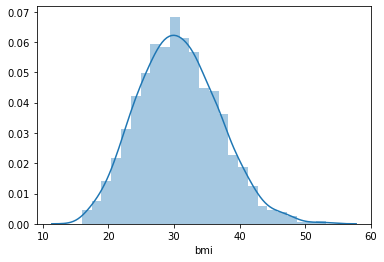

In [84]:
sns.distplot(df['bmi'])

Bmi seems to have quite normal distribution

Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

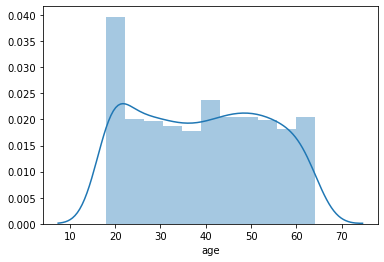

In [83]:
sns.distplot(df['age'])

Age seems to have uniform distribution

Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

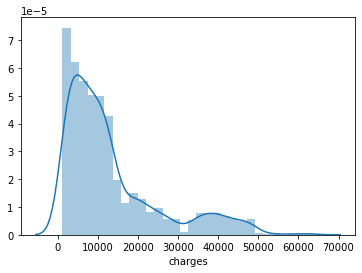

In [85]:
sns.distplot(df['charges'])

Charges are highly skewed. Positive skewed.
We can infer that claims for diseases, for which treatment is cheaper(which means they might be more common and not rare), are high.

Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [22]:
df['bmi'].skew()

0.2840471105987448

Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [23]:
df['age'].skew()

0.05567251565299186

Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [24]:
df['charges'].skew()

1.5158796580240388

Skewness of all columns of dataframe

In [25]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

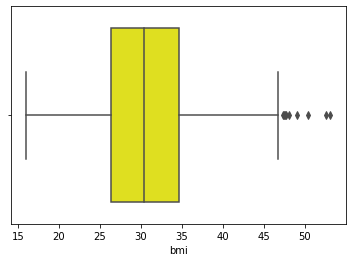

In [86]:
sns.boxplot(df['bmi'],color='yellow')

Bmi has a few extreme values

Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

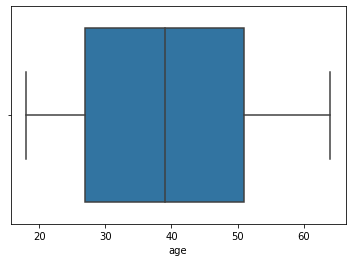

In [30]:
sns.boxplot(df['age'])

Age is uniformly distributed and does not have any extreme value

Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

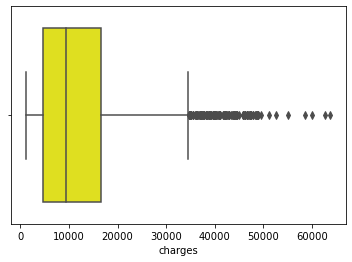

In [78]:
sns.boxplot(df['charges'],color='yellow')

As charges is column highly skewed, it has a lot of extreme values

Distribution of categorical columns - Smoker Distribution

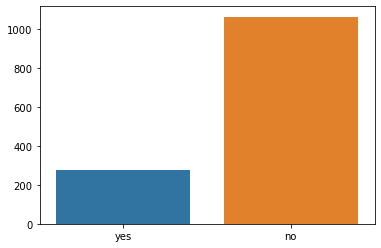

In [9]:
array = df['smoker'].unique()
namelist=[]
countlist=[]
 

for i in range(len(array)):   
    text = array[i]
    namelist.append(text)
    count = df[df['smoker']==text]     
    countlist.append(len(count))
    
sns.barplot(x=namelist, y=countlist, data=df)    

 

There are lot more non-smokers than smokers in the given sample.

Distribution of categorical columns - Gender Distribution

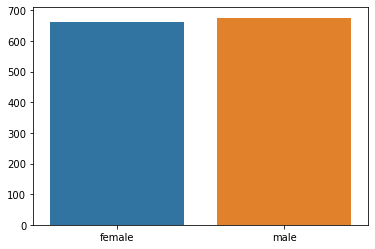

In [12]:
array = df['sex'].unique()
namelist=[]
countlist=[]
 

for i in range(len(array)):   
    text = array[i]
    namelist.append(text)
    count = df[df['sex']==text]     
    countlist.append(len(count))
    
sns.barplot(x=namelist, y=countlist, data=df )    

 

Gender is distributed evenly

Distribution of categorical columns - Region Distribution

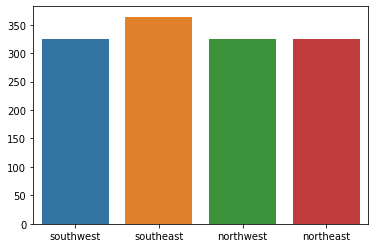

In [146]:
array = df['region'].unique()
namelist=[]
countlist=[]
 

for i in range(len(array)):   
    text = array[i]
    namelist.append(text)
    count = df[df['region']==text]     
    countlist.append(len(count))
    
sns.barplot(x=namelist, y=countlist, data=df)    

 

As gender, region is also evenly distributed

Distribution of categorical columns - Children Distribution

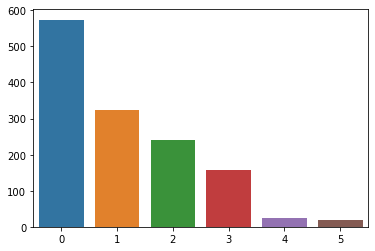

In [147]:
array = df['children'].unique()
namelist=[]
countlist=[]
 

for i in range(len(array)):   
    text = array[i]
    namelist.append(text)
    count = df[df['children']==text]     
    countlist.append(len(count))
    
sns.barplot(x=namelist, y=countlist, data=df)    

 

Majority of people have no children. Mostly people have 2 or less than 2 children.

Pair plot that includes all the columns of the data frame

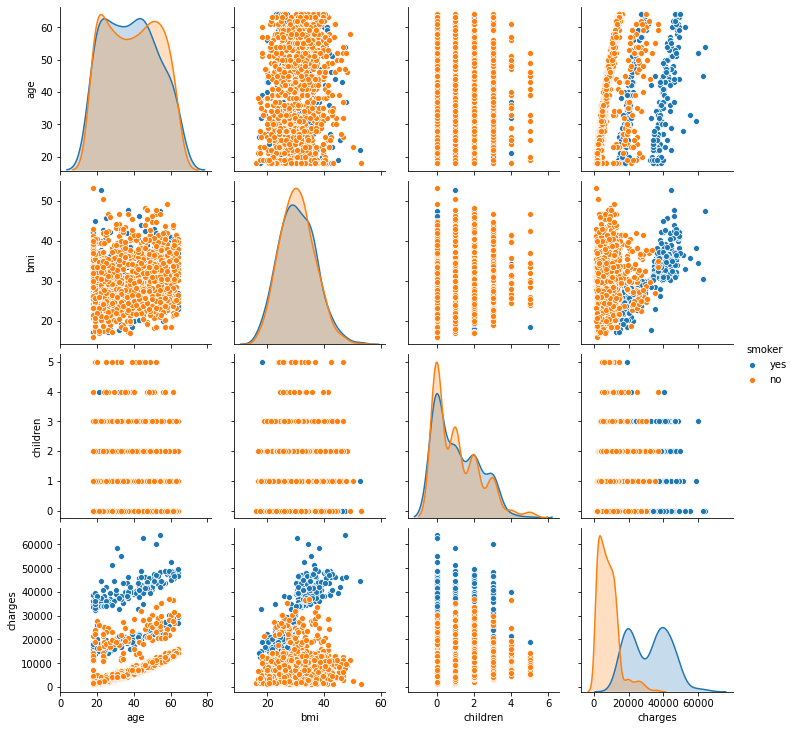

In [3]:
sns.pairplot(df,hue="smoker")

We can see that charges for smokers are high as compared to non-smokers

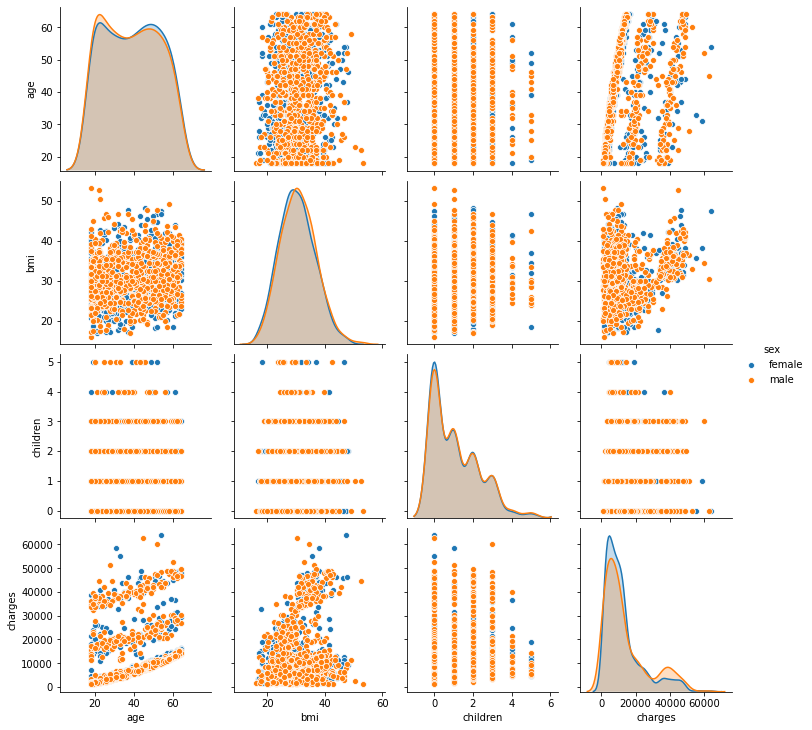

In [4]:
sns.pairplot(df,hue="sex")

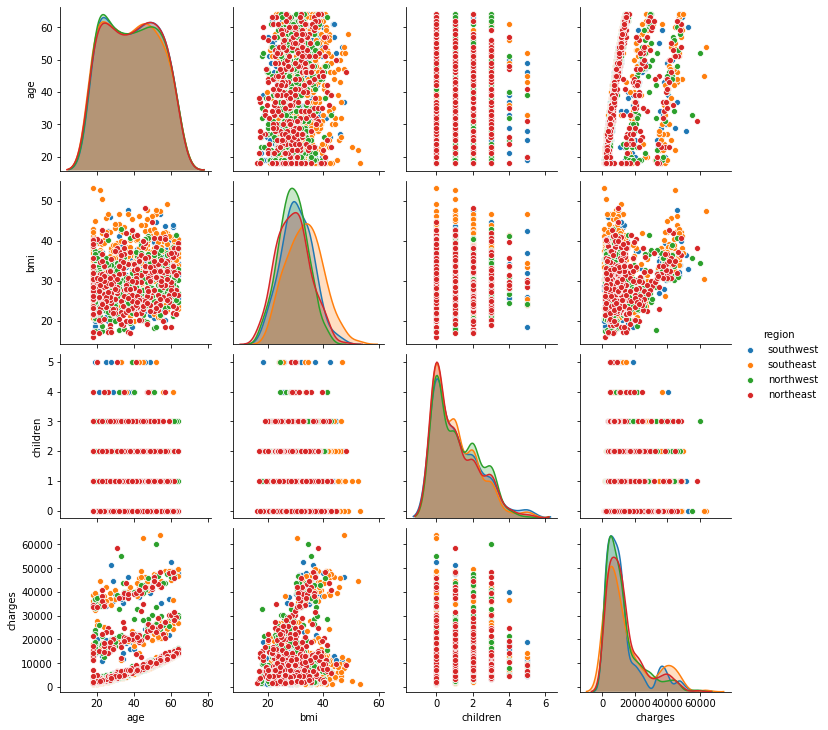

In [5]:
sns.pairplot(df,hue="region")

Do charges of people who smoke differ significantly from the people who don't?

Null Hypothesis Ho: Charges of people who smoke is equal to charges of people who don't.
Alternate Hypothesis Ha: Charges of people who smoke is not equal to charges of people who don't.  

Requires two sample t-test
Significance(alpha) level set at 0.05

Created two groups: group_smoker_charges for  & group_non_smoker_charges

In [14]:
group_smoker= df[df['smoker']=='yes']
group_smoker_charges=group_smoker['charges']
len(group_smoker_charges)

274

In [15]:
group_non_smoker= df[df['smoker']=='no']
group_non_smoker_charges=group_non_smoker['charges']
len(group_non_smoker_charges)

1064

Performing two sample t-test

In [18]:
t_statistic,p_value= stats.ttest_ind(group_smoker_charges,group_non_smoker_charges)

print('t_statistic= ',t_statistic)
print('p_value= ',p_value)

t_statistic=  46.664921172723716
p_value=  8.271435842177219e-283


Result: p-value is less than 0.05, hence rejecting Null Hypothesis and we can conclude that charges for smokers are quite high
than that of non-smokers.
It is also evident in scatterplot below

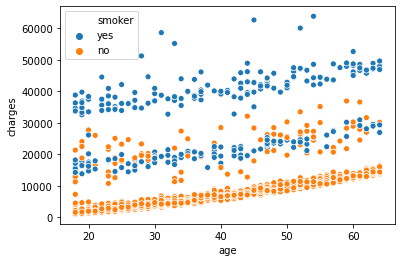

In [25]:
sns.scatterplot(df['age'],df['charges'],hue=df['smoker'])

Does bmi of males differ significantly from that of females?

Null Hypothesis Ho: Bmi of males is equal to Bmi of females.
Alternate Hypothesis Ha: Bmi of males is not equal to Bmi of females.

Requires two sample t-test
Significance level set at 0.05

Created two groups: group_males for  & group_females

In [29]:
group_males= df[df['sex']=='male']
group_males_bmi=group_males['bmi']
len(group_males_bmi)

676

In [30]:
group_females= df[df['sex']=='female']
group_females_bmi=group_females['bmi']
len(group_females_bmi)

662

Performing two sample t-test

In [32]:
t_statistic,p_value= stats.ttest_ind(group_males_bmi,group_females_bmi)

print('t_statistic= ',t_statistic)
print('p_value= ',p_value)

t_statistic=  1.696752635752224
p_value=  0.08997637178984932


Result: p-value is more than 0.05, hence fail to reject Null Hypothesis and we can conclude that Bmi of both males and females are same.
As it is also visible in scatterplot below

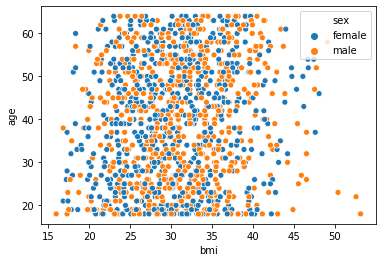

In [31]:
sns.scatterplot(df['bmi'],df['age'],hue=df['sex'])

Is the proportion of smokers significantly different in different genders?

Null Hypothesis Ho: Gender affects smoking habits.
Alternate Hypothesis Ha: Gender does not affect smoking habits.

Gender & smoking, both are categorical variables so we need to perform Chi Square Test 
Significance level set at 0.05

In [52]:
crosstab = pnds.crosstab(df['smoker'], df['sex'])
crosstab

sex,female,male
smoker,,
no,547,517
yes,115,159


In [56]:
t_statistic,p_value,dof,expectedValues= stats.chi2_contingency(crosstab)

print('t_statistic= ',t_statistic)
print('p_value= ',p_value)
print('dof= ',dof)
print('expectedValues= ',expectedValues)

t_statistic=  7.39291081459996
p_value=  0.006548143503580696
dof=  1
expectedValues=  [[526.43348281 537.56651719]
 [135.56651719 138.43348281]]


Result: p-value is less than 0.05, hence reject Null Hypothesis
We can conclude that gender does not affect smoking habits.

Is the distribution of bmi across women with no children, one child and two children, the same?

First let's visualize distributions for all three cases as below. 

Distribution of bmi for women with no children

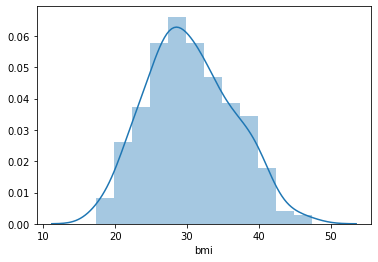

In [85]:
childzero = df[df['children']==0]
group_females_zero = childzero[childzero['sex']=='female']
group_females_bmi_zero = group_females_zero['bmi']
sns.distplot(group_females_bmi_zero)

Distribution of bmi for women with 1 child

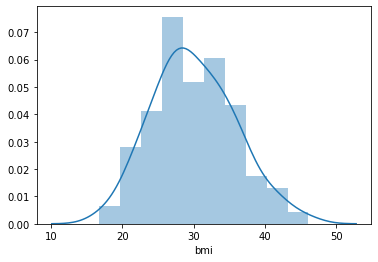

In [80]:
childone = df[df['children']==1]
group_females_one = childone[childone['sex']=='female']
group_females_bmi_one = group_females_one['bmi']
sns.distplot(group_females_bmi_one)

Distribution of bmi for women with 2 children

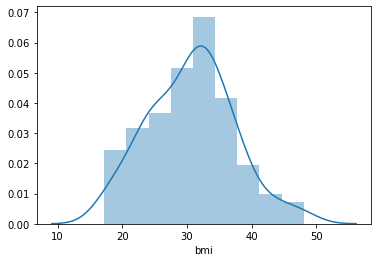

In [81]:
childtwo = df[df['children']==2]
group_females_two = childtwo[childtwo['sex']=='female']
group_females_bmi_two = group_females_two['bmi']
sns.distplot(group_females_bmi_two)

By looking all three distributions, we don't observe any significant difference.

Now, in this question we need to compare distribution so we can compare mean. So, to compare multiple means, we can do ANOVA.
This is my interpretation from the given question.

First we do the Shapiro test to check for normality.
Shapiro Test
Null Hypothesis - Data is normally distributed
Alternate Hypothesis - Data is not normally distributed
Significance level(alpha level) = 0.05

In [91]:
statistic_zero, p_value_zero = stats.shapiro(group_females_bmi_zero)
statistic_one,  p_value_one = stats.shapiro(group_females_bmi_one)
statistic_two,  p_value_two = stats.shapiro(group_females_bmi_two)

print('p_value_zero = ',p_value_zero)
print('p_value_one = ',p_value_one)
print('p_value_two = ',p_value_two)

p_value_zero =  0.03757598251104355
p_value_one =  0.5361911654472351
p_value_two =  0.2596229910850525


As per interpretation given on Wiki https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test : 
The null-hypothesis of this test is that the population is normally distributed. 
Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.
On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis that the data came from a normally distributed population can not be rejected 


So the p-values for group_females_bmi_zero, group_females_bmi_one and group_females_bmi_two,are greater than 0.05. 
Hence we fail to reject null hypothesis and conclude that data is normally distributed.   

Second, we check for equality of variances. This is Levene's test
Levene's test
H0: All variances are equal
Ha: Atleast one of the variances is not equal
Significance level(alpha level) = 0.05

In [93]:
statistic , p_value  = stats.levene(group_females_bmi_zero,group_females_bmi_one,group_females_bmi_two)
print('p_value = ',p_value) 

p_value =  0.3899432394522804


p-value > 0.05 hence we fail to reject null hypothesis and conclude that all variances are equal.

Now, we can proceed ahead with ANOVA
H0 = Number of children has no effect on bmi of females
Ha = Number of children has an effect on bmi of females
Significance level(alpha level) = 0.05

In [94]:
f, p = stats.f_oneway(group_females_bmi_zero,group_females_bmi_one,group_females_bmi_two)
print ('F value:', f)
print ('P value:', p, '\n')


F value: 0.3344720147757968
P value: 0.7158579926754841 



p-value > 0.05 hence we fail to reject null hypothesis and conclude that number of children has no effect on bmi of females.